# The Oscars

## Librerías y lectura de datos

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

In [76]:
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 120
sns.set_theme(style="whitegrid", palette="muted")

In [77]:
df = pd.read_csv("data/master_dataset.csv")
print(f"Shape: {df.shape}")
df.head(3)

Shape: (170, 70)


,ceremony_year,nominated_title,won_best_picture,tmdb_id,tmdb_title,synopsis,tagline,budget,revenue,runtime_min,...,genre_comedy,genre_biography,genre_history,genre_romance,genre_thriller,genre_war,rt_norm,imdb_norm,metacritic_norm,critic_composite
0,2025,Anora,1,1064213,Anora,A young sex worker from Brooklyn gets her chan...,Love is a hustle.,6000000,56286295,139,...,1,0,0,1,0,0,93.0,74.0,91.0,86.000000
1,2025,The Brutalist,0,549509,The Brutalist,When an innovative modern architect flees post...,Welcome to America.,9600000,50145227,215,...,0,0,0,0,0,0,93.0,73.0,90.0,85.333333
2,2025,A Complete Unknown,0,661539,A Complete Unknown,"New York, early 1960s. Against the backdrop of...",The ballad of a true original.,65000000,138003641,140,...,0,0,0,0,0,0,82.0,73.0,70.0,75.000000


In [78]:
df.columns

Index(['ceremony_year', 'nominated_title', 'won_best_picture', 'tmdb_id',
       'tmdb_title', 'synopsis', 'tagline', 'budget', 'revenue', 'runtime_min',
       'release_date', 'original_language', 'genres', 'tmdb_popularity',
       'tmdb_vote_avg', 'tmdb_vote_count', 'director', 'cast_top5',
       'production_companies', 'imdb_id', 'imdb_rating', 'imdb_votes',
       'metacritic', 'rt_score', 'box_office_usd', 'rated', 'omdb_awards',
       'country', 'language', 'WGA_adapted_nominated', 'WGA_adapted_won',
       'GG_drama_nominated', 'GG_drama_won', 'CCA_best_picture_nominated',
       'CCA_best_picture_won', 'BAFTA_best_film_nominated',
       'BAFTA_best_film_won', 'GG_comedy_nominated', 'GG_comedy_won',
       'WGA_original_nominated', 'WGA_original_won',
       'PGA_best_picture_nominated', 'PGA_best_picture_won',
       'GG_animation_nominated', 'GG_animation_won', 'budget_m', 'revenue_m',
       'log_budget', 'log_revenue', 'roi', 'log_imdb_votes', 'release_month',
       'is

## Valores Faltantes

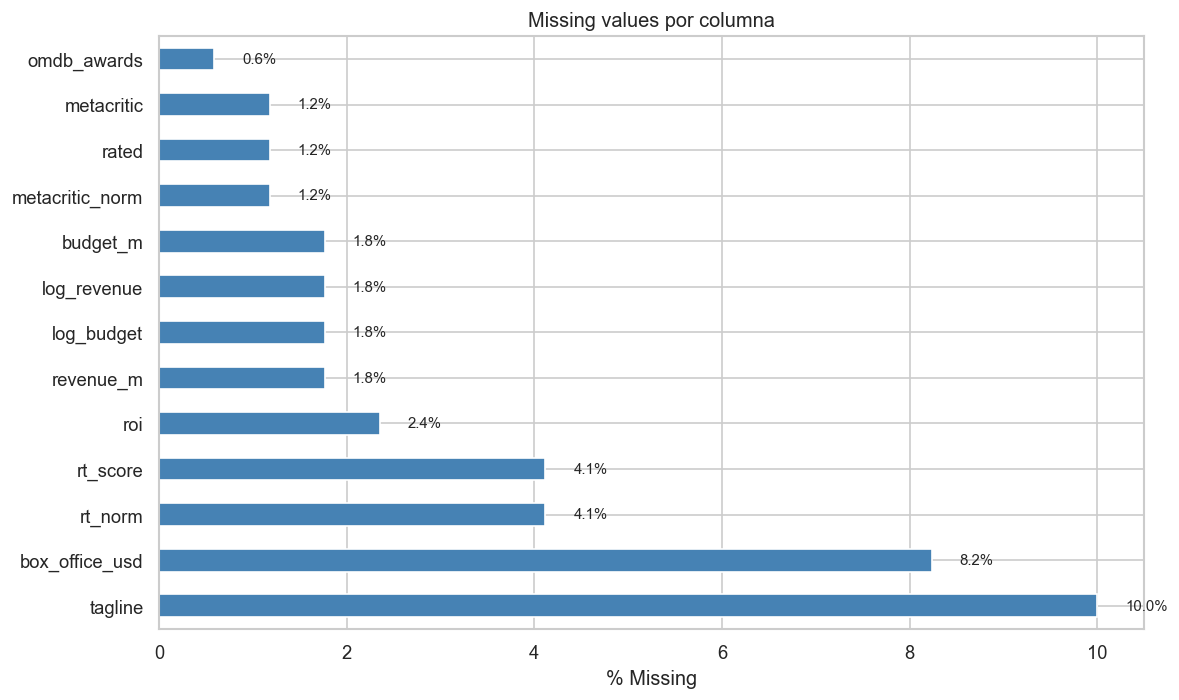

In [79]:
missing = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing = missing[missing > 0]

fig, ax = plt.subplots(figsize=(10, 6))
missing.plot(kind="barh", ax=ax, color="steelblue")
ax.set_xlabel("% Missing")
ax.set_title("Missing values por columna")
for i, v in enumerate(missing):
    ax.text(v + 0.3, i, f"{v:.1f}%", va="center", fontsize=9)
plt.tight_layout()
plt.show()

## Variables categóricas

In [80]:
df["original_language"].value_counts()

original_language
en    160
fr      4
pt      1
de      1
ja      1
ko      1
es      1
ro      1
Name: count, dtype: int64

In [81]:
df["main_language"].value_counts()

main_language
English          157
Korean             3
French             2
Spanish            2
Japanese           2
German             2
Portuguese         1
American Sign      1
Name: count, dtype: int64

In [82]:
df[df["main_language"] == "American Sign"][["nominated_title", "ceremony_year", "original_language"]].sort_values("original_language")

,nominated_title,ceremony_year,original_language
29,CODA,2022,en


In [83]:
df["rated"].value_counts(dropna=False)

rated
R            95
PG-13        61
PG            9
NaN           2
Unrated       1
G             1
Not Rated     1
Name: count, dtype: int64

In [84]:
df["rated"] = df["rated"].fillna("Not Rated").replace("Unrated", "Not Rated")
df["rated"].value_counts()
# R: 95, PG-13: 61, PG: 9, Not Rated: 4, G: 1


rated
R            95
PG-13        61
PG            9
Not Rated     4
G             1
Name: count, dtype: int64

In [85]:
df["country"].value_counts().head(20)


country
United States                                                                                           66
United Kingdom, United States                                                                           12
United States, Canada                                                                                    7
United States, United Kingdom                                                                            6
United States, India                                                                                     5
United Kingdom, France, United States                                                                    5
United States, China                                                                                     3
Canada, United States                                                                                    2
France, Canada, United States                                                                            2
United States, Australia     

In [86]:
df["main_country"] = df["country"].str.split(",").str[0].str.strip()
df["main_country"].value_counts().head(20)

main_country
United States     114
United Kingdom     30
France              6
Ireland             5
Germany             3
Brazil              2
New Zealand         2
Canada              2
South Korea         1
Japan               1
Mexico              1
Australia           1
Spain               1
South Africa        1
Name: count, dtype: int64

In [87]:
df["n_countries"] = df["country"].str.split(",").str.len()
df["n_countries"].value_counts().head(20)


n_countries
1     70
2     50
3     34
4     12
8      1
10     1
5      1
6      1
Name: count, dtype: int64

In [88]:
df["n_languages"] = df["language"].str.split(",").str.len()
df["n_languages"].value_counts().head(20)

n_languages
1    60
2    57
3    23
4    19
5     4
7     3
9     2
6     1
8     1
Name: count, dtype: int64

In [89]:
df["director"].value_counts().head(20)
# Buscar nulls, "Unknown", múltiples directores en un solo campo

director
Steven Spielberg               7
Martin Scorsese                6
Alexander Payne                4
Christopher Nolan              3
Greta Gerwig                   3
Adam McKay                     3
Denis Villeneuve               3
David Fincher                  3
Paul Thomas Anderson           3
Quentin Tarantino              3
David O. Russell               3
Clint Eastwood                 3
Yorgos Lanthimos               2
Martin McDonagh                2
Bradley Cooper                 2
Alfonso Cuarón                 2
Guillermo del Toro             2
Stephen Frears                 2
Alejandro González Iñárritu    2
Damien Chazelle                2
Name: count, dtype: int64

## Variables numéricas

In [90]:
numeric_cols = ["budget_m", "revenue_m", "roi", "runtime_min",
                "imdb_rating", "rt_score", "metacritic",
                "tmdb_vote_avg", "days_to_ceremony",
                "total_precursor_wins", "total_precursor_noms"]
df[numeric_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
budget_m,167.0,45.47,50.41,1.30,14.00,25.00,55.00,237.00
revenue_m,167.0,225.52,342.28,0.11,47.44,123.38,243.79,2923.71
roi,166.0,6.47,6.69,0.00,2.69,4.71,8.33,56.76
runtime_min,170.0,129.39,22.92,76.00,114.00,128.50,140.75,215.00
imdb_rating,170.0,7.63,0.46,5.40,7.40,7.60,7.90,8.80
rt_score,163.0,89.26,8.47,44.00,88.00,92.00,94.00,99.00
metacritic,168.0,81.85,10.17,46.00,77.00,83.00,89.00,100.00
tmdb_vote_avg,170.0,7.45,0.44,6.28,7.14,7.44,7.75,8.49
days_to_ceremony,170.0,145.76,78.34,46.00,93.00,128.00,170.00,513.00
total_precursor_wins,170.0,0.82,1.20,0.00,0.00,0.00,1.00,5.00


In [91]:
numeric_cols = ["budget_m", "revenue_m", "roi", "runtime_min",
                "imdb_rating", "rt_score", "metacritic",
                "tmdb_vote_avg", "days_to_ceremony",
                "total_precursor_wins", "total_precursor_noms"]
df[numeric_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
budget_m,167.0,45.47,50.41,1.30,14.00,25.00,55.00,237.00
revenue_m,167.0,225.52,342.28,0.11,47.44,123.38,243.79,2923.71
roi,166.0,6.47,6.69,0.00,2.69,4.71,8.33,56.76
runtime_min,170.0,129.39,22.92,76.00,114.00,128.50,140.75,215.00
imdb_rating,170.0,7.63,0.46,5.40,7.40,7.60,7.90,8.80
rt_score,163.0,89.26,8.47,44.00,88.00,92.00,94.00,99.00
metacritic,168.0,81.85,10.17,46.00,77.00,83.00,89.00,100.00
tmdb_vote_avg,170.0,7.45,0.44,6.28,7.14,7.44,7.75,8.49
days_to_ceremony,170.0,145.76,78.34,46.00,93.00,128.00,170.00,513.00
total_precursor_wins,170.0,0.82,1.20,0.00,0.00,0.00,1.00,5.00


In [92]:
films = ["Slumdog Millionaire", "12 Years a Slave", "Birdman", "Nomadland"]
award_won_cols = [c for c in df.columns if c.endswith("_won") and c != "won_best_picture"]

df[df["nominated_title"].isin(films)][
    ["nominated_title", "ceremony_year", "total_precursor_wins"] + award_won_cols
].T


,39,90,98,145
nominated_title,Nomadland,Birdman,12 Years a Slave,Slumdog Millionaire
ceremony_year,2021,2015,2014,2009
total_precursor_wins,4,0,4,5
WGA_adapted_won,0,0,0,1
GG_drama_won,1,0,1,1
CCA_best_picture_won,1,0,1,1
BAFTA_best_film_won,1,0,1,1
GG_comedy_won,0,0,0,0
WGA_original_won,0,0,0,0
PGA_best_picture_won,1,0,1,1


In [ ]:
print(f"Películas con budget=0: {(df['budget_m']==0).sum()}")
print(f"Películas con revenue=0: {(df['revenue_m']==0).sum()}")

In [ ]:
df[["nominated_title","runtime_min"]].sort_values("runtime_min")

In [ ]:
df[["nominated_title","budget_m","revenue_m","roi"]].sort_values("roi", ascending=False).head(10)

In [ ]:
print(df["days_to_ceremony"].describe())
print(f"Negativos: {(df['days_to_ceremony'] < 0).sum()}")
df[df["days_to_ceremony"] < 0][["nominated_title","release_date","ceremony_year","days_to_ceremony"]]

## Variables binarias

In [ ]:
winners_per_year = df.groupby("ceremony_year")["won_best_picture"].sum()
print(winners_per_year)
# Debe ser exactamente 1 por año

In [ ]:
award_cols = [c for c in df.columns if c.endswith("_won") or c.endswith("_nominated")]
for col in award_cols:
    vals = df[col].unique()
    if not set(vals).issubset({0, 1}):
        print(f"⚠ {col}: {vals}")

In [ ]:
df["total_precursor_wins"].value_counts().sort_index()
# Comparar ganadoras vs nominadas

## Fechas

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
print(f"Fechas inválidas: {df['release_date'].isna().sum()}")
print(f"Rango: {df['release_date'].min()} → {df['release_date'].max()}")
# Películas con fecha de estreno DESPUÉS de la ceremonia?
late = df[df["release_date"].dt.year > df["ceremony_year"]]